<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 7


# Question 1

In this question, you need to choose a Kernel method for SVM to make a classification of the below data.

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
n_samples = 1500
X,y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

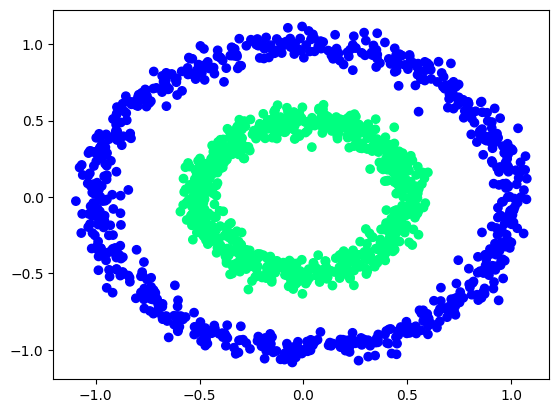

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

You need to do the following computation:
1. Compute 4 kernel functions SVM. In this step, we take a look at the different kernel functions. The penalty term C is set to 1 for all classifiers. For the multiclass classification, the type one-versus-one is specified, as can be seen in decision_function_shape=’ovo’. For the polynomial function, the degree of 3 is selected, this is not necessary for other kernel functions. All other parameters are set to default.
2. Make predictions on the whole data set using our 4 different kernel functions.
3. Do the scatter plot for 4 kernel functions prediction, just like the above scatter plot but change 'y' to the predictions.


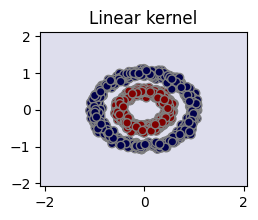

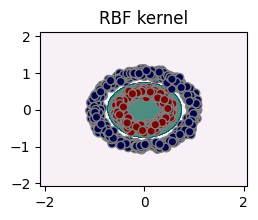

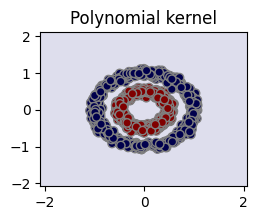

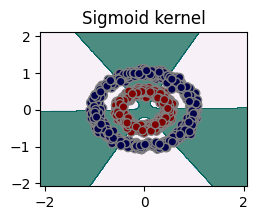

In [15]:
## answer 1

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01

#create the mesh

# 1. the size of the meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# each np.arange() returns a 1-D array. 
# np.meshgrid() take these 1D arrays as input and returns 2D coordinate matrices from coordinate vectors
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) 
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7) #`cmap=plt.cm.PuBuGn` is the color map. Purple-Blue-Green. 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='seismic',     edgecolors='grey')
    plt.title(titles[i])
    plt.show()

# Question 2

In this question, we revisit the `iris` example in lecture. 

Enter

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

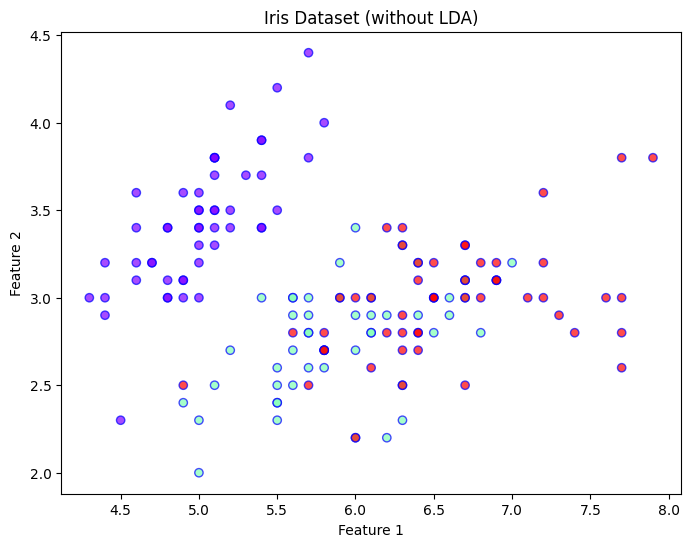

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=y, 
    cmap='rainbow', 
    alpha=0.7, 
    edgecolors='b'
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Dataset (without LDA)')
plt.show()

## Q2a

Perform linear discriminant analysis on the iris dataset. 

Plot the two LDA components.


In [21]:
## answer 2a

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

print(X.shape)
print(y.shape)

(150, 2)
(150,)


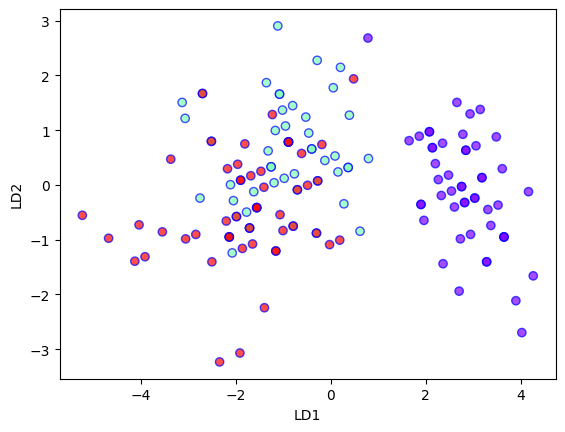

In [19]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

## Q2b

Use `train_test_split` to split the LDA results into training and testing sets with `random_state = 1`.

Use `sklearn.tree.DecisionTreeClassifier` to classify the training set. 

Then predict each sample in the testing set and print the confusion matrix of the classifier on the testing set. 

In [20]:
## answer 2b
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predicgt each sample in the testing set
y_pred = dt.predict(X_test)

# print the confusion matrix of the classifier on the testing set
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 1,  7,  5],
       [ 0,  3,  3]], dtype=int64)